# How to download Yahoo data
## A Risk Hedging Application on Renewable and REIT (Real Estate)

It is worth noting that downloading financial data using Python, particularly through Yahoo Finance API, is straightforward and highly accessible. I utilized this approach to hedge my renewable energy portfolio's exposure to inflation risk. Inflation poses a significant challenge to renewable energy stocks due to their long-duration cash flows and the substantial debt required to finance their projects. Consequently, periods of elevated inflation are particularly detrimental to this sector.  
https://pypi.org/project/yfinance/

Despite these risks, I maintaisoment exposure to renewable energy stocks as I believe they aly undervalueddue toen current geopolitical dynamics and the globaideologyadespite the shiftft toward sustainability. This perspective is supported by broader trends and analyses, such as those highlighted in recent Financial Times coverage
https://www.ft.com/content/83c6dd46-7096-4430-8186-6672c999d99f. 

In [3]:
#!pip install yfinance

### Import Data

In [5]:
import yfinance as yf
import pandas as pd
import seaborn as sns # heatmap
import matplotlib.pyplot as plt 

In [6]:
# Define the ticker symbol 
ticker = ["^GSPC", #SP500
          "ICLN", #Reneable Energy
          "VNQ", #REIT
          "^TNX",  # 10-Year Treasury yield
          "TIP"] #Inflation

# Download historical data (e.g., 10 years of daily data)
data = yf.download(ticker, start="2010-01-01", end="2023-12-31", group_by='ticker') #, group_by='ticker' otherwise it is painful.

# Display the first few rows
print(data.head())

[*********************100%%**********************]  5 of 5 completed
             ^TNX                                              ^GSPC  \
             Open   High    Low  Close Adj Close Volume         Open   
Date                                                                   
2010-01-04  3.859  3.859  3.808  3.841     3.841    0.0  1116.560059   
2010-01-05  3.790  3.800  3.749  3.755     3.755    0.0  1132.660034   
2010-01-06  3.771  3.837  3.761  3.808     3.808    0.0  1135.709961   
2010-01-07  3.845  3.859  3.800  3.822     3.822    0.0  1136.270020   
2010-01-08  3.843  3.851  3.775  3.808     3.808    0.0  1140.520020   

                                                   ...        VNQ             \
                   High          Low        Close  ...        Low      Close   
Date                                               ...                         
2010-01-04  1133.869995  1116.560059  1132.989990  ...  44.200001  44.549999   
2010-01-05  1136.630005  1129.6600

C:\Users\Hugo\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Hugo\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Hugo\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Hugo\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.t

### Generation a correlation matrix, with heatmap visualisation

In [8]:
# Extract the Adjusted Close prices
adj_close = data.loc[:, (slice(None), 'Adj Close')] # This adjust for dividends. 

# Flatten the multi-index columns (make it easier to work with)
adj_close.columns = [col[0] for col in adj_close.columns]

In [9]:
# Rename columns for better readability
adj_close.rename(columns={
    '^GSPC': 'SP500',
    'VNQ': 'REIT',
    'ICLN': 'Renewable',
    '^TNX': '10-Year Treasury',
    'TIP': 'Inflation'
}, inplace=True)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25704\186353089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close.rename(columns={


In [10]:
# Compute the correlation matrix
correlation_matrix = adj_close.corr()

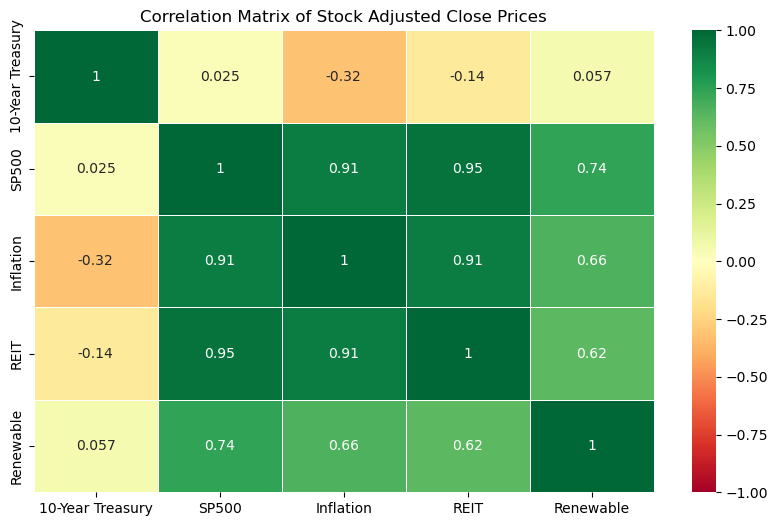

In [11]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Stock Adjusted Close Prices')
plt.show()

One can see that the S&P 500 and REITs are clearly correlated with each other, but imperfectly correlated with Renewable Energy, making the inclusion of Renewable Energy an interesting addition to a portfolio heavily based on market-based strategies. Interestingly, the 10-year Treasury yield shows no correlation with the S&P 500. As we might expect, inflation is positively correlated with both the S&P 500 and REITs. This makes sense because stock valuation represents the present (discounted) value of future profits. Higher nominal earnings—driven by inflation—should increase actual stock valuations. However, one must acknowledge that, in the short run, an increase in the discount rate (e.g., the Federal Reserve's overnight rate) also impacts stock valuations by raising the cost of capital.

On the other hand, the relationship between Renewable Energy and the S&P 500 is more nuanced, with a 66% correlation. This likely stems from the fact that future income for Renewable Energy assets might increase, but the value of current portfolios is more sensitive to discount rate adjustments.

Moreover, for those with exposure to Renewable Energy — whether for risk management or ethical reasons — considering some allocation to REITs could be beneficial. This avenue is particularly attractive for dividend-oriented investors. However, for those with a longer time horizon, growth stocks (SP500/VOO) might offer higher returns and similar protection against inflation, all while benefiting from much lower ETF fees.

This short guide not only demonstrates how to import financial data with Python but also provides insight into the historical correlation between Renewable Energy, the broader market (S&P 500), and other assets like REITs. It highlights that owning stocks such as the S&P 500 provides excellent protection against inflation. Furthermore, the imperfect correlation between Renewable Energy and the market makes this asset class particularly interesting. However, it is worth noting that Renewable Energy is highly sensitive to inflation—a critical consideration in the current post-global geopolitical era.

### Annualize Datas


In [14]:
# Calculate daily returns
daily_returns = adj_close.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).prod() - 1  # Total return over the period

# Calculate annualized returns
trading_days = len(daily_returns)
annualized_returns = (1 + cumulative_returns) ** (252 / trading_days) - 1

# Create a DataFrame for the results
results_df = pd.DataFrame(annualized_returns.items(), columns=["Asset Group", "Annualized Return"])


C:\Users\Hugo\AppData\Local\Temp\ipykernel_25704\3820834815.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = adj_close.pct_change().dropna()


In [15]:
results_df

,Asset Group,Annualized Return
0,10-Year Treasury,0.000464
1,SP500,0.108357
2,Inflation,0.027395
3,REIT,0.092344
4,Renewable,-0.004946
